<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/MiniHackethonAutoencoding_Plant_Images_Denoising_Jagadish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Denoise the leaf images using deep learning techniques

## Learning Objectives

At the end of the Mini Hackathon, you will be able to :
* Denoise healthy/diseased leaf images using Autoencoder
* Visualize the denoised images

In [ ]:
#@title Mini Hackathon Walkthrough Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/misc/M3_Mini_Hackathon1_Plant_Images_Denoising.mp4" type="video/mp4">
</video>
""")

## Background

Crop losses due to diseases are a major threat to food security every year, across countries.  Conventionally, plant diseases were detected through a visual examination of the affected plants by plant pathology experts. This was often possible only after major damage had already occurred, so treatments were of limited or no use. Recently, access to smartphone based image capturing has highly increased amongst farmers and agriculturists. This has led to the successful adoption of plant disease diagnostic applications based on deep learning techniques. This is of immense value in the field of agriculture and an excellent tool for faster identification and treatment of crop diseases. It holds key importance in preventing crop based food and economic losses.
## Dataset and Methodology

The dataset for this Mini-Hackathon is derived from the 'Plant Village' Dataset.Around 4500 images of healthy and diseased leaves and their labels have been taken from the 'Plant Village' Dataset. The 4500 images consist of 5 different classes - Bell Pepper Healthy, Bell Pepper Bacterial Spot, Potato Healthy, Potato Early Blight and Potato Late Blight. The original pictures have been clicked in a well controlled environment with very less noise in the images. This is not how real world data may look like.  So we have added noise to the original images to form a noisy dataset. We can use deep learning techniques such as an autoencoder for obtaining denoised images.


## References:

[Plant Village Dataset Description](https://drive.google.com/file/d/1xGhK-KhhE8W_lfr3l6KT_9K8prHDRb9_/view?usp=sharing)


[Deep Learning for Plant Disease Detection](https://drive.google.com/file/d/1V7NgFs-YGG3G-pz3OJf2X-KQxOGRZzRu/view?usp=sharing)

[Autoencoder motivational Expt](https://colab.research.google.com/drive/1gkxGlPQ5F3PtugI_zKMeFl3fYVOmscxk?authuser=1#scrollTo=Yv3ZC8aOKJqL)


## Grading = 10 Marks

## Setup Steps

In [ ]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="M3_Mini_Hackathon1_Plant_Images_Denoising" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
   ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/PlantVillage_Noisy_Dataset.zip")
   ipython.magic("sx unzip -qq PlantVillage_Noisy_Dataset.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


**Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable

## **Stage 1:** Data Preparation

### 1 Marks - > Prepare the dataset

1. Define transformations:
   * Transform image size to 128 by using Resize()
   * Transform the image into a number using tensor
2. Load the dataset with the defined transformations.

In [ ]:
#  the transforming the dataset

data_transform = transforms.Compose([
        transforms.Resize((128,128)),
        transforms.ToTensor()
    ])

dataset = datasets.ImageFolder(root='PlantVillage', transform=data_transform)

In [ ]:
#  for preparing trainloader and testloader set

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
print(train_size)
print(test_size)

7392
1848


## **Stage 2:** Build and Train the Model



### 2 Marks -> Write the encoder and decoder layers in one class

* Define the Autoencoder neural network
    *  First define the layers required in the  __init__ function.
    *  Build the neural network in the forward() function.

[Hint for saving the images](https://debuggercafe.com/implementing-deep-autoencoder-in-pytorch/)

In [ ]:
#  for constructing an autoencoder model

class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    # Encoder layers
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)

    # Decoder layers
    self.t_conv1 = nn.ConvTranspose2d(8, 16, kernel_size=2, stride=2)
    self.t_conv2 = nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2)

  def forward(self, x):
    # Encode
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)

    # Decode
    x = F.relu(self.t_conv1(x))
    x = torch.sigmoid(self.t_conv2(x))

    return x

### 2 Marks -> Train the Model and calculate the loss for dataset for each epoch.

1. Declare the loss function and optimizer
2. Create a directory for saving the output images.
2. Train the model
   *  Extract the image features only as we do not take the labels to train the autoencoder network.
   * Calculate the loss.
   * Append the loss values after every epoch and print them.
   * Save the output (denoised) images in a directory.

In [ ]:
#  for declaring the loss function and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#  for declaring the loss function and optimizer

losses = []
num_epochs = 10
!mkdir output_images

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss = running_loss / len(trainloader)
    losses.append(loss)
    print("Epoch {} of {}, Loss: {:.3f}".format(epoch+1, num_epochs, loss))

    # Save some output images
    if (epoch+1) % 5 == 0:
        output_dir = 'output_images/epoch_{}'.format(epoch+1)
        !mkdir -p {output_dir}
        for i in range(5):
            img = outputs[i].detach().numpy().transpose(1, 2, 0)
            plt.imsave('{}/{}.png'.format(output_dir, i), img)


Epoch 1 of 10, Loss: 0.019
Epoch 2 of 10, Loss: 0.008
Epoch 3 of 10, Loss: 0.007
Epoch 4 of 10, Loss: 0.006
Epoch 5 of 10, Loss: 0.006
Epoch 6 of 10, Loss: 0.005
Epoch 7 of 10, Loss: 0.005
Epoch 8 of 10, Loss: 0.005
Epoch 9 of 10, Loss: 0.005
Epoch 10 of 10, Loss: 0.005


In [ ]:
#  for declaring the loss function and optimizer

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#  defining a function for creating the directory

def create_directory(directory_path):
  """
  Creates a directory if it does not exist.

  Args:
    directory_path: The path to the directory to be created.
  """
  if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
  else:
    print(f"Directory '{directory_path}' already exists.")


In [ ]:
#  Train the model and print the loss at each epoch. Also save the output (denoised) images in a directory.
import os

losses = []
num_epochs = 10
create_directory('output_images')

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss = running_loss / len(trainloader)
    losses.append(loss)
    print("Epoch {} of {}, Loss: {:.3f}".format(epoch+1, num_epochs, loss))

    # Save some output images
    if (epoch+1) % 5 == 0:
        output_dir = 'output_images/epoch_{}'.format(epoch+1)
        create_directory(output_dir)
        for i in range(5):
            img = outputs[i].detach().numpy().transpose(1, 2, 0)
            plt.imsave('{}/{}.png'.format(output_dir, i), img)


Directory 'output_images' already exists.
Epoch 1 of 10, Loss: 0.005
Epoch 2 of 10, Loss: 0.005
Epoch 3 of 10, Loss: 0.005
Epoch 4 of 10, Loss: 0.004
Epoch 5 of 10, Loss: 0.004
Directory 'output_images/epoch_5' already exists.
Epoch 6 of 10, Loss: 0.004
Epoch 7 of 10, Loss: 0.004
Epoch 8 of 10, Loss: 0.004
Epoch 9 of 10, Loss: 0.004
Epoch 10 of 10, Loss: 0.004
Directory 'output_images/epoch_10' already exists.


In [ ]:
#  Record loss of the train denoised images

train_losses = []
with torch.no_grad():
    for images, _ in trainloader:
        outputs = model(images)
        loss = criterion(outputs, images)
        train_losses.append(loss.item())

average_train_loss = sum(train_losses) / len(train_losses)
print("Average Train Loss:", average_train_loss)


Average Train Loss: 0.0039257624245035054


## **Stage 3:** Visualize the Denoised images

### 2 Marks -> Verify the denoised images and compare with original noisy images
1. Plot the original noisy images.
2. Plot denoised images which are saved in the directory.
3. Verify whether denoised images have less noise compared to original noisy images

**Hint:** If the noise is not reduced in the denoised images then revise the autoencoder architecture.

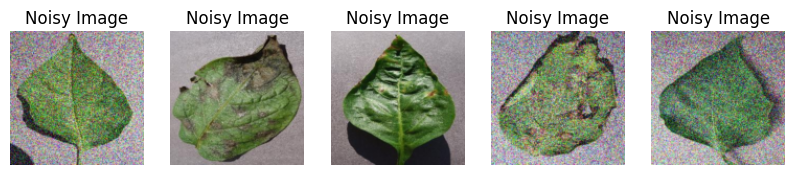

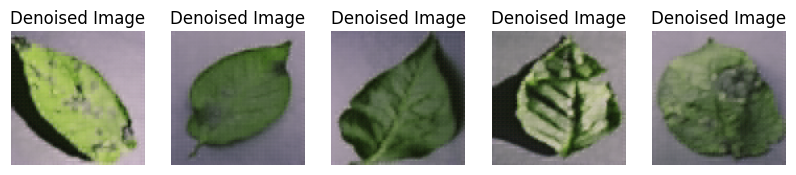

In [ ]:
#  for plotting and verifying the images (original noisy images and denoising images)

import matplotlib.pyplot as plt
import os

# Plot original noisy images
plt.figure(figsize=(10, 5))
for i in range(5):
    image, _ = train_dataset[i]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title("Noisy Image")
    plt.axis("off")
plt.show()

# Plot denoised images
latest_epoch_dir = sorted(os.listdir('output_images'))[-1]
denoised_image_dir = os.path.join('output_images', latest_epoch_dir)

plt.figure(figsize=(10, 5))
for i in range(5):
    image_path = os.path.join(denoised_image_dir, f"{i}.png")
    image = plt.imread(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title("Denoised Image")
    plt.axis("off")
plt.show()


## **Stage 4:** Test the Model

### 2 Marks -> Evaluate model with the given test data

1. Extract only the images of test loader data as we do not use the labels for the autoencoder network
2. Pass the test images through the autoencoder model to get the denoised images of the test data.
3. Calculate the loss of the test images

In [ ]:
#  for recording the loss of the test dataset

test_losses = []
with torch.no_grad():
    for images, _ in testloader:
        outputs = model(images)
        loss = criterion(outputs, images)
        test_losses.append(loss.item())

average_test_loss = sum(test_losses) / len(test_losses)
print("Average Test Loss:", average_test_loss)


Average Test Loss: 0.003916047067895275


### 1 Marks -> Visualizing and verifying test images with the original test noisy dataset

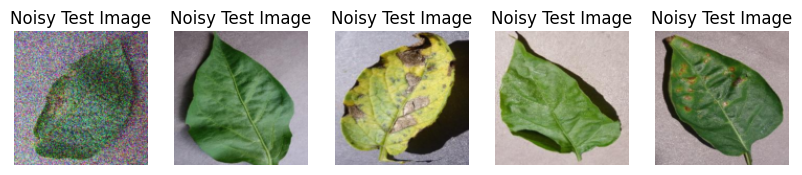

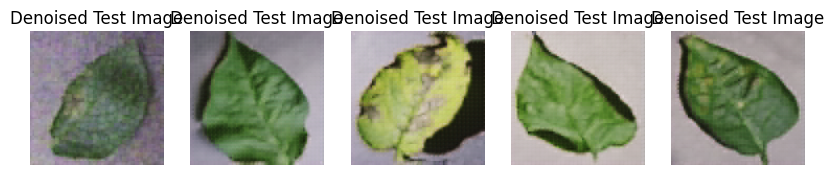

In [ ]:
#  for verification and visualization of the test denoised images and original test noisy images

# Plot original noisy test images
plt.figure(figsize=(10, 5))
for i in range(5):
    image, _ = test_dataset[i]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title("Noisy Test Image")
    plt.axis("off")
plt.show()

# Plot denoised test images
with torch.no_grad():
    for i, (images, _) in enumerate(testloader):
        if i == 0:  # Take images from the first batch
            outputs = model(images)
            plt.figure(figsize=(10, 5))
            for j in range(5):
                img = outputs[j].detach().numpy().transpose(1, 2, 0)
                plt.subplot(1, 5, j + 1)
                plt.imshow(img)
                plt.title("Denoised Test Image")
                plt.axis("off")
            plt.show()
            break
